<a href="https://colab.research.google.com/github/SergJohn/Crypto-Prediction-2022-Project/blob/main/Prophet_Model_With_dash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install --upgrade pandas pip install --upgrade pandas-datareader

In [ ]:
#pip install pandas-datareader


In [ ]:
#!pip install pystan fbprophet


In [ ]:
import pandas as pd
from fbprophet import Prophet

In [ ]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

In [ ]:
# Data1 Using static Dataset from Yahoo Finance, data from 2014 afterwards
#data_btc = pd.read_csv('BTC-USD.csv',index_col = [0])

In [ ]:
# Data2 Getting Yahoo Finance from pdr = data from 2020 afterwards
data_btc = pdr.get_data_yahoo('BTC-USD')

In [ ]:
data_btc.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-05-03,1492.770020,1447.489990,1453.780029,1490.089966,583795968,1490.089966
2017-05-04,1608.910034,1490.719971,1490.719971,1537.670044,933548992,1537.670044
2017-05-05,1618.030029,1530.310059,1540.869995,1555.449951,946035968,1555.449951
2017-05-06,1578.800049,1542.500000,1556.810059,1578.800049,582529984,1578.800049
2017-05-07,1596.719971,1559.760010,1579.469971,1596.709961,1080029952,1596.709961


In [ ]:
data_btc.info

<bound method DataFrame.info of                     High           Low          Open         Close  \
Date                                                                 
2017-05-03   1492.770020   1447.489990   1453.780029   1490.089966   
2017-05-04   1608.910034   1490.719971   1490.719971   1537.670044   
2017-05-05   1618.030029   1530.310059   1540.869995   1555.449951   
2017-05-06   1578.800049   1542.500000   1556.810059   1578.800049   
2017-05-07   1596.719971   1559.760010   1579.469971   1596.709961   
...                  ...           ...           ...           ...   
2022-04-28  40269.464844  38941.421875  39241.429688  39773.828125   
2022-04-29  39887.269531  38235.535156  39768.617188  38609.824219   
2022-04-30  38771.210938  37697.941406  38605.859375  37714.875000   
2022-05-01  38627.859375  37585.789062  37713.265625  38469.093750   
2022-05-02  39061.562500  38453.156250  38491.511719  38793.300781   

                 Volume     Adj Close  
Date             

In [ ]:
# For Data2 - Transforming the index in a Date columns
data_btc=data_btc.reset_index()

In [ ]:
data_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1826 non-null   datetime64[ns]
 1   High       1826 non-null   float64       
 2   Low        1826 non-null   float64       
 3   Open       1826 non-null   float64       
 4   Close      1826 non-null   float64       
 5   Volume     1826 non-null   int64         
 6   Adj Close  1826 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 100.0 KB


In [ ]:
# For Data2
data_btc.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [ ]:
data_btc.tail()

,Date,Close
1821,2022-04-28,39773.828125
1822,2022-04-29,38609.824219
1823,2022-04-30,37714.875000
1824,2022-05-01,38469.093750
1825,2022-05-02,38793.300781


In [ ]:
data_btc.columns = ['ds','y']

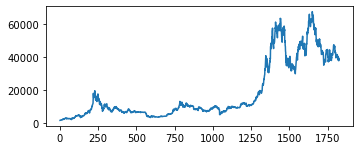

In [ ]:
fig = plt.figure(figsize = (5.5, 5.5))
ax = fig.add_subplot(2, 1, 1)
fig.subplots_adjust(hspace = 0.5)
data_btc['y'].plot(ax = ax)

In [ ]:
data_btc.tail()

,ds,y
1821,2022-04-28,39773.828125
1822,2022-04-29,38609.824219
1823,2022-04-30,37714.875000
1824,2022-05-01,38469.093750
1825,2022-05-02,38793.300781


In [ ]:
data_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1826 non-null   datetime64[ns]
 1   y       1826 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.7 KB


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
m = Prophet(interval_width=0.95,daily_seasonality=False)
model = m.fit(data_btc)

C:\Users\jonathansantos\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [ ]:
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast.tail()

C:\Users\jonathansantos\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jonathansantos\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1921,2022-08-06,41599.258391,31139.614725,50396.776004,35834.275298,46937.782176,-700.293038,-700.293038,-700.293038,6.178946,6.178946,6.178946,-706.471984,-706.471984,-706.471984,0.0,0.0,0.0,40898.965353
1922,2022-08-07,41583.839680,30585.330268,51508.871830,35706.229873,46994.638840,-603.981032,-603.981032,-603.981032,-16.905748,-16.905748,-16.905748,-587.075284,-587.075284,-587.075284,0.0,0.0,0.0,40979.858648
1923,2022-08-08,41568.420968,30708.154862,49971.668097,35578.184449,47050.820459,-455.259731,-455.259731,-455.259731,16.033761,16.033761,16.033761,-471.293492,-471.293492,-471.293492,0.0,0.0,0.0,41113.161237
1924,2022-08-09,41553.002256,31433.406927,50943.436549,35450.139024,47106.095160,-357.351692,-357.351692,-357.351692,2.034369,2.034369,2.034369,-359.386061,-359.386061,-359.386061,0.0,0.0,0.0,41195.650564
1925,2022-08-10,41537.583545,30364.340805,50691.789604,35318.367241,47161.369861,-203.274626,-203.274626,-203.274626,48.318652,48.318652,48.318652,-251.593278,-251.593278,-251.593278,0.0,0.0,0.0,41334.308919


In [ ]:
forecast.tail(20)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1906,2022-07-22,41830.539067,29625.863892,48310.114188,37486.596440,45784.711122,-2648.529844,-2648.529844,-2648.529844,-16.470557,-16.470557,-16.470557,-2632.059287,-2632.059287,-2632.059287,0.0,0.0,0.0,39182.009223
1907,2022-07-23,41815.120355,29872.723510,47727.659924,37372.720641,45871.090061,-2511.984544,-2511.984544,-2511.984544,6.178946,6.178946,6.178946,-2518.163490,-2518.163490,-2518.163490,0.0,0.0,0.0,39303.135811
1908,2022-07-24,41799.701643,30014.680500,48743.046842,37259.154090,45957.129687,-2415.635559,-2415.635559,-2415.635559,-16.905748,-16.905748,-16.905748,-2398.729812,-2398.729812,-2398.729812,0.0,0.0,0.0,39384.066084
1909,2022-07-25,41784.282932,30259.723375,48105.824917,37145.587538,46011.525259,-2258.624994,-2258.624994,-2258.624994,16.033761,16.033761,16.033761,-2274.658755,-2274.658755,-2274.658755,0.0,0.0,0.0,39525.657938
1910,2022-07-26,41768.864220,29062.349510,48626.577168,37032.020987,46113.333352,-2144.802779,-2144.802779,-2144.802779,2.034369,2.034369,2.034369,-2146.837148,-2146.837148,-2146.837148,0.0,0.0,0.0,39624.061441
1911,2022-07-27,41753.445508,30197.943409,49406.770894,36918.454436,46173.905483,-1967.807366,-1967.807366,-1967.807366,48.318652,48.318652,48.318652,-2016.126018,-2016.126018,-2016.126018,0.0,0.0,0.0,39785.638142
1912,2022-07-28,41738.026797,30805.836053,49415.154738,36804.887885,46234.126253,-1922.539754,-1922.539754,-1922.539754,-39.189423,-39.189423,-39.189423,-1883.350331,-1883.350331,-1883.350331,0.0,0.0,0.0,39815.487043
1913,2022-07-29,41722.608085,30336.546096,50042.542028,36710.073614,46294.133986,-1765.761275,-1765.761275,-1765.761275,-16.470557,-16.470557,-16.470557,-1749.290718,-1749.290718,-1749.290718,0.0,0.0,0.0,39956.846810
1914,2022-07-30,41707.189373,30666.678457,49587.576901,36625.638787,46352.997039,-1608.498274,-1608.498274,-1608.498274,6.178946,6.178946,6.178946,-1614.677220,-1614.677220,-1614.677220,0.0,0.0,0.0,40098.691099
1915,2022-07-31,41691.770662,30418.983594,49221.188530,36541.203959,46413.464118,-1497.090796,-1497.090796,-1497.090796,-16.905748,-16.905748,-16.905748,-1480.185048,-1480.185048,-1480.185048,0.0,0.0,0.0,40194.679866


In [ ]:
forecast[['ds','yhat']]

,ds,yhat
0,2017-05-03,3360.320181
1,2017-05-04,3314.973423
2,2017-05-05,3364.141931
3,2017-05-06,3396.068960
4,2017-05-07,3363.994732
...,...,...
1921,2022-08-06,40898.965353
1922,2022-08-07,40979.858648
1923,2022-08-08,41113.161237
1924,2022-08-09,41195.650564


In [ ]:
train = data_btc['y']
test = forecast['yhat'][:1826].values

mae = mean_absolute_error(train, test)
print('MAE: %.3f' % mae)


print(f'r^2 score = {r2_score(train,test)}')

MAE: 3163.466
r^2 score = 0.9383909852629867


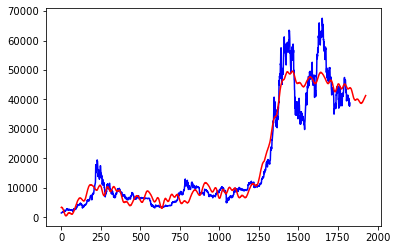

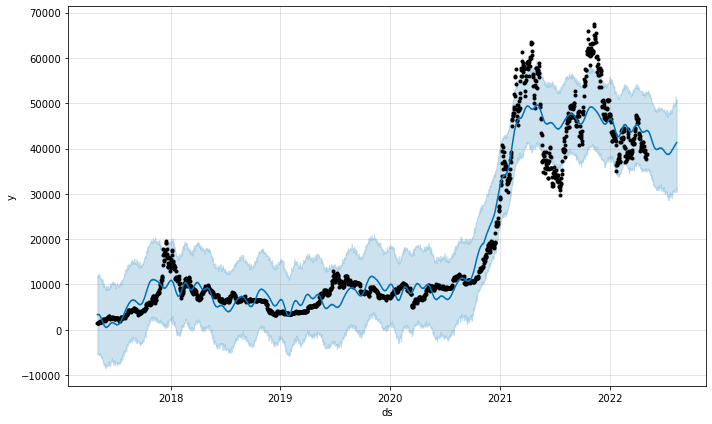

In [ ]:
data_btc['y'].plot(color='b', linestyle = '-')
forecast['yhat'].plot(color='r', linestyle = '-')
plot = m.plot(forecast)


C:\Users\jonathansantos\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jonathansantos\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


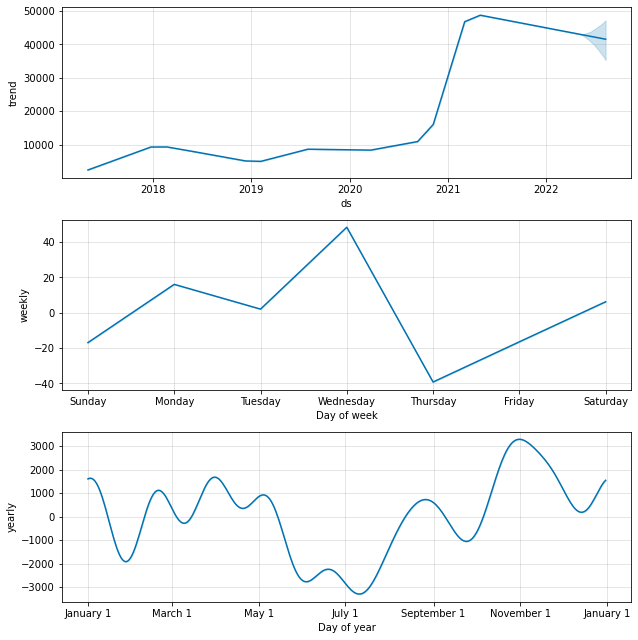

In [ ]:
plot2 = m.plot_components(forecast)

In [ ]:
#pip install dash

In [ ]:
#pip install dash_bootstrap_components

In [ ]:
import dash
import dash_html_components as html
import plotly.graph_objects as go
import dash_core_components as dcc
import plotly.express as px
from dash.dependencies import Input, Output


app = dash.Dash()

<ipython-input-28-0ce921b7a48c>:2: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
<ipython-input-28-0ce921b7a48c>:4: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


In [ ]:
app.layout = html.Div([

html.Div([
    html.Img( src = 'https://freepngimg.com/thumb/bitcoin/59620-cryptocurrency-bitcoin-free-frame.png',
             style = {'width':'150px','display':'block', 'margin-left':'auto', 'margin-right':'auto'}),
    
    html.H1(id = 'H1', children = 'Crypto Prediction', style = {'textAlign':'center',\
                                            'marginTop':40,'marginBottom':40})
    ]),

    
html.Div([       
        
        dcc.Dropdown( id = 'dropdown',
        options = [
            {'label':'Prophet', 'value':'Prof' },
            {'label': 'ARIMA', 'value':'arm'},
            {'label': 'Smoothing', 'value':'smt'},
            ],
        value = 'arm', style = {'background-color': 'lightblue'}),
        dcc.Graph(id = 'bar_plot')
        
    ])
    
   
    ])

In [ ]:
@app.callback(Output(component_id='bar_plot', component_property= 'figure'),
              [Input(component_id='dropdown', component_property= 'value')])

def graph_update(dropdown_value):
    print(dropdown_value)
    
    if dropdown_value == 'Prof':
        fig = go.Figure()
        fig.add_trace(go.Scatter(x = forecast['ds'],y = forecast['yhat'],\
                     line = dict(color = 'firebrick', width = 4), name = 'prophet'
                     ))
        fig.add_trace(go.Scatter(x = data_btc['ds'],y = data_btc['y'],\
                     line = dict(color = 'blue', width = 4), name = 'prophet'
                     ))
        fig.update_layout(title = 'Prices over time',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Prices'
                      )
        return fig

    elif dropdown_value == 'arm':

        fig_two = go.Figure([go.Scatter(x = data_btc['ds'], y = data_btc['y'],\
                     line = dict(color = 'firebrick', width = 4))
                     ])
        fig_two.update_layout(title = 'Prices over time',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Prices'
                      )    

        return fig_two  
    elif dropdown_value == 'smt':

        fig_three = go.Figure([go.Scatter(x = forecast['ds'],y = forecast['yhat'],\
                     line = dict(color = 'firebrick', width = 4))
                     ])
        fig_three.update_layout(title = 'Prices over time',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Prices'
                      )    

        return fig_three
    
    else:
        print('test')
        

In [ ]:

if __name__ == '__main__': 
    app.run_server()

Dash is running on http://127.0.0.1:8050/



INFO:__main__:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)


Prof


INFO:werkzeug:127.0.0.1 - - [02/May/2022 12:28:03] "POST /_dash-update-component HTTP/1.1" 200 -
